# Polynomial Regression
- Polynomial regression is a type of regression analysis in which the relationship between the independent variable \( x \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial.
- It is used when the data shows a curvilinear relationship that cannot be adequately captured by a simple linear regression model.
- The general form of a polynomial regression model is:
  
  \[
  y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + ... + \beta_n x^n + \epsilon
  \]
  
  where:
  - \( y \) is the dependent variable,
  - \( x \) is the independent variable,
  - \( \beta_0, \beta_1, ..., \beta_n \) are the coefficients of the polynomial,
  - \( n \) is the degree of the polynomial,
  - \( \epsilon \) is the error term.
  - To fit a polynomial regression model, the following steps are typically followed:
    - Collect and preprocess the data. 
    - Choose the degree of the polynomial based on the data and the desired complexity of the model.
    - Transform the independent variable \( x \) into its polynomial features (e.g., \( x^2, x^3, ..., x^n \)).
    - Use a regression algorithm (like ordinary least squares) to estimate the coefficients \( \beta_0, \beta_1, ..., \beta_n \).
    - Evaluate the model's performance using metrics such as R-squared, Mean Squared Error (MSE), etc.
    - Visualize the results to assess the fit of the polynomial curve to the data points.
- Polynomial regression can be implemented using various programming languages and libraries, such as Python with libraries like NumPy, SciPy, and scikit-learn.
- It is important to be cautious about overfitting when using high-degree polynomials, as they can fit the training data very closely but may perform poorly on unseen data.
- Regularization techniques, such as Ridge or Lasso regression, can be employed to mitigate overfitting in polynomial regression models.
- Polynomial regression is widely used in various fields, including economics, biology, engineering, and social sciences, to model complex relationships between variables.
- Overall, polynomial regression is a powerful tool for capturing non-linear relationships in data, but it requires careful consideration of model complexity and validation to ensure robust performance.

In [21]:
## Importing Liberaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
X = 6 * np.random.rand(100, 1) - 3 ## Generates random values between -3 and 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1) ## Quadratic equation with some noise

Text(0, 0.5, 'y dataset')

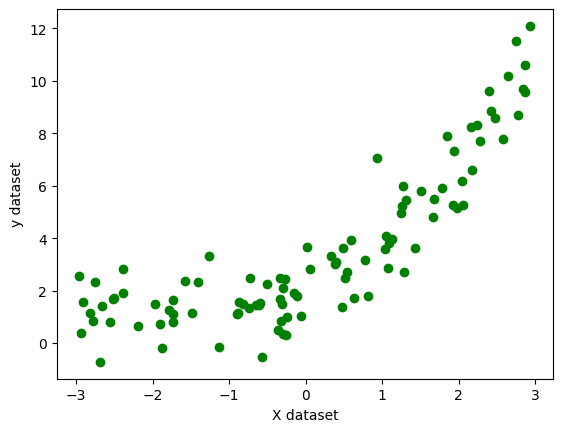

In [23]:
plt.scatter(X, y, color='green')
plt.xlabel("X dataset")
plt.ylabel("y dataset")

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
## Let's implement simple Linear Regression first
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [26]:
X_train

array([[ 1.51380025],
       [ 1.0521334 ],
       [ 1.27366837],
       [ 2.77317486],
       [ 1.26442374],
       [-2.75808603],
       [-0.30064961],
       [-0.31714776],
       [-2.51626202],
       [ 1.08842804],
       [ 0.63117522],
       [ 0.81876012],
       [ 0.77752908],
       [-2.38205359],
       [ 0.39080229],
       [ 1.65903438],
       [-2.7838212 ],
       [-0.82007214],
       [ 2.23426671],
       [-2.95523722],
       [-1.13527482],
       [ 1.43392485],
       [ 1.77664988],
       [-0.31029828],
       [-2.50772992],
       [ 2.16692424],
       [ 1.67434024],
       [ 2.05775481],
       [-1.78986701],
       [-0.26834416],
       [-0.86690897],
       [-1.73202096],
       [-0.10946828],
       [-0.33359768],
       [ 1.07068754],
       [ 1.92198842],
       [ 1.98259814],
       [-2.93154919],
       [ 0.38352404],
       [ 0.4750832 ],
       [-0.61190787],
       [ 2.84015485],
       [ 1.84061294],
       [-1.49107651],
       [-1.2567066 ],
       [ 0

In [27]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
from sklearn.metrics import r2_score
sscore = r2_score(y_test, regression.predict(X_test))
print("R2 Score for Simple Linear Regression: ", sscore)

R2 Score for Simple Linear Regression:  0.68546565864875


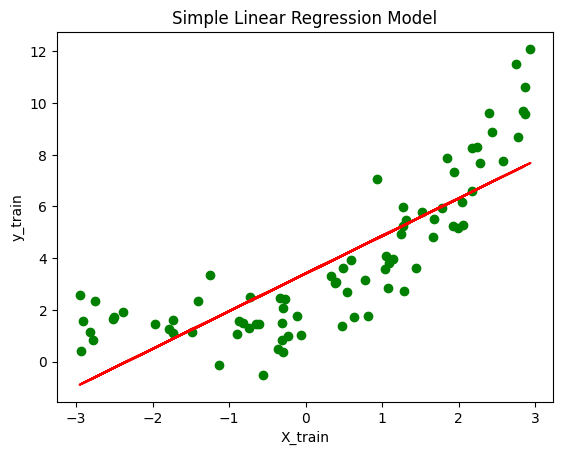

In [29]:
## Lets visualize the model
plt.plot(X_train, regression.predict(X_train), color='red')
plt.scatter(X_train, y_train, color='green')
plt.xlabel("X_train")
plt.ylabel("y_train")
plt.title("Simple Linear Regression Model")
plt.show()

In [30]:
## Let's apply Polynomial transformation now
from sklearn.preprocessing import PolynomialFeatures

In [37]:
poly = PolynomialFeatures(degree=2, include_bias=True) ## Creating polynomial features of degree 2

In [38]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [39]:
X_train_poly

array([[ 1.00000000e+00,  1.51380025e+00,  2.29159119e+00],
       [ 1.00000000e+00,  1.05213340e+00,  1.10698469e+00],
       [ 1.00000000e+00,  1.27366837e+00,  1.62223111e+00],
       [ 1.00000000e+00,  2.77317486e+00,  7.69049880e+00],
       [ 1.00000000e+00,  1.26442374e+00,  1.59876738e+00],
       [ 1.00000000e+00, -2.75808603e+00,  7.60703854e+00],
       [ 1.00000000e+00, -3.00649613e-01,  9.03901901e-02],
       [ 1.00000000e+00, -3.17147762e-01,  1.00582703e-01],
       [ 1.00000000e+00, -2.51626202e+00,  6.33157454e+00],
       [ 1.00000000e+00,  1.08842804e+00,  1.18467559e+00],
       [ 1.00000000e+00,  6.31175217e-01,  3.98382154e-01],
       [ 1.00000000e+00,  8.18760115e-01,  6.70368126e-01],
       [ 1.00000000e+00,  7.77529077e-01,  6.04551465e-01],
       [ 1.00000000e+00, -2.38205359e+00,  5.67417931e+00],
       [ 1.00000000e+00,  3.90802288e-01,  1.52726429e-01],
       [ 1.00000000e+00,  1.65903438e+00,  2.75239508e+00],
       [ 1.00000000e+00, -2.78382120e+00

In [40]:
X_test_poly

array([[ 1.00000000e+00,  5.19568264e-01,  2.69951181e-01],
       [ 1.00000000e+00,  5.51567142e-02,  3.04226312e-03],
       [ 1.00000000e+00, -1.56006894e-01,  2.43381510e-02],
       [ 1.00000000e+00, -8.82783062e-01,  7.79305934e-01],
       [ 1.00000000e+00, -2.50493226e-01,  6.27468564e-02],
       [ 1.00000000e+00, -5.99104302e-01,  3.58925964e-01],
       [ 1.00000000e+00, -2.55541713e+00,  6.53015670e+00],
       [ 1.00000000e+00,  1.78354669e-02,  3.18103878e-04],
       [ 1.00000000e+00, -2.18726674e+00,  4.78413578e+00],
       [ 1.00000000e+00, -2.65972113e+00,  7.07411651e+00],
       [ 1.00000000e+00, -2.68110217e+00,  7.18830884e+00],
       [ 1.00000000e+00,  2.48037609e+00,  6.15226553e+00],
       [ 1.00000000e+00, -4.99976748e-01,  2.49976749e-01],
       [ 1.00000000e+00, -3.35564096e-01,  1.12603262e-01],
       [ 1.00000000e+00, -2.38707312e+00,  5.69811806e+00],
       [ 1.00000000e+00, -1.57557928e+00,  2.48245007e+00],
       [ 1.00000000e+00, -1.87792309e+00

In [41]:
regression.fit(X_train_poly, y_train)
y_pred_poly = regression.predict(X_test_poly)
pscore = r2_score(y_test, y_pred_poly)
print("R2 Score for Polynomial Regression: ", pscore)

R2 Score for Polynomial Regression:  0.8560839220830121


In [42]:
print("Polynomial Regression Coefficients:", regression.coef_)

Polynomial Regression Coefficients: [[0.         1.42441326 0.49291458]]


In [44]:
print("Polynomial Regression Intercept:", regression.intercept_)

Polynomial Regression Intercept: [1.98186734]


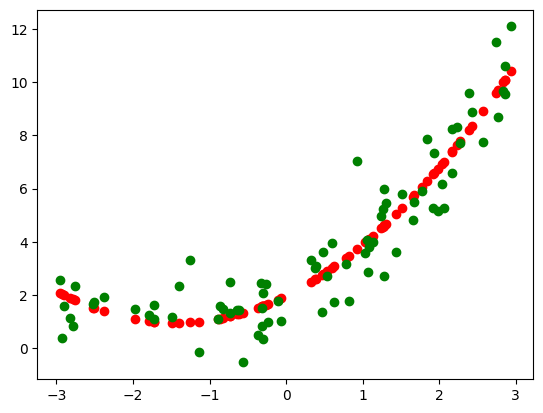

In [47]:
plt.scatter(X_train, regression.predict(X_train_poly) , color='red')
plt.scatter(X_train, y_train, color='green')

In [48]:
# What if we increase the degree of polynomial features to 3 or 4? Will it improve the model? Try it out yourself!
poly = PolynomialFeatures(degree=3, include_bias=True) ## Creating polynomial features of degree 3
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [49]:
X_train_poly

array([[ 1.00000000e+00,  1.51380025e+00,  2.29159119e+00,
         3.46901132e+00],
       [ 1.00000000e+00,  1.05213340e+00,  1.10698469e+00,
         1.16469557e+00],
       [ 1.00000000e+00,  1.27366837e+00,  1.62223111e+00,
         2.06618445e+00],
       [ 1.00000000e+00,  2.77317486e+00,  7.69049880e+00,
         2.13270979e+01],
       [ 1.00000000e+00,  1.26442374e+00,  1.59876738e+00,
         2.02151943e+00],
       [ 1.00000000e+00, -2.75808603e+00,  7.60703854e+00,
        -2.09808667e+01],
       [ 1.00000000e+00, -3.00649613e-01,  9.03901901e-02,
        -2.71757757e-02],
       [ 1.00000000e+00, -3.17147762e-01,  1.00582703e-01,
        -3.18995791e-02],
       [ 1.00000000e+00, -2.51626202e+00,  6.33157454e+00,
        -1.59319005e+01],
       [ 1.00000000e+00,  1.08842804e+00,  1.18467559e+00,
         1.28943413e+00],
       [ 1.00000000e+00,  6.31175217e-01,  3.98382154e-01,
         2.51448943e-01],
       [ 1.00000000e+00,  8.18760115e-01,  6.70368126e-01,
      

In [50]:
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
pscore = r2_score(y_test, y_pred)
print(pscore)

0.8636145629083567


In [55]:
## Prediction of new data set
x_new = np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
x_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

In [57]:
y_new = regression.predict(x_new_poly)

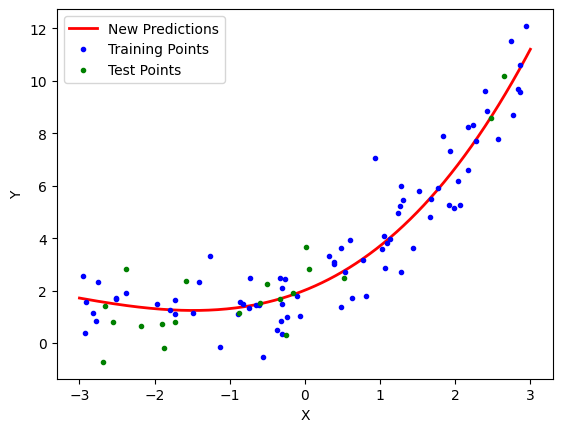

In [59]:
plt.plot(x_new, y_new, 'r-', linewidth=2, label='New Predictions')
plt.plot(X_train, y_train, 'b.', label='Training Points')
plt.plot(X_test, y_test, 'g.', label='Test Points')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()